Shape of dataset: (503, 8)

First 5 rows:
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

After cleanin

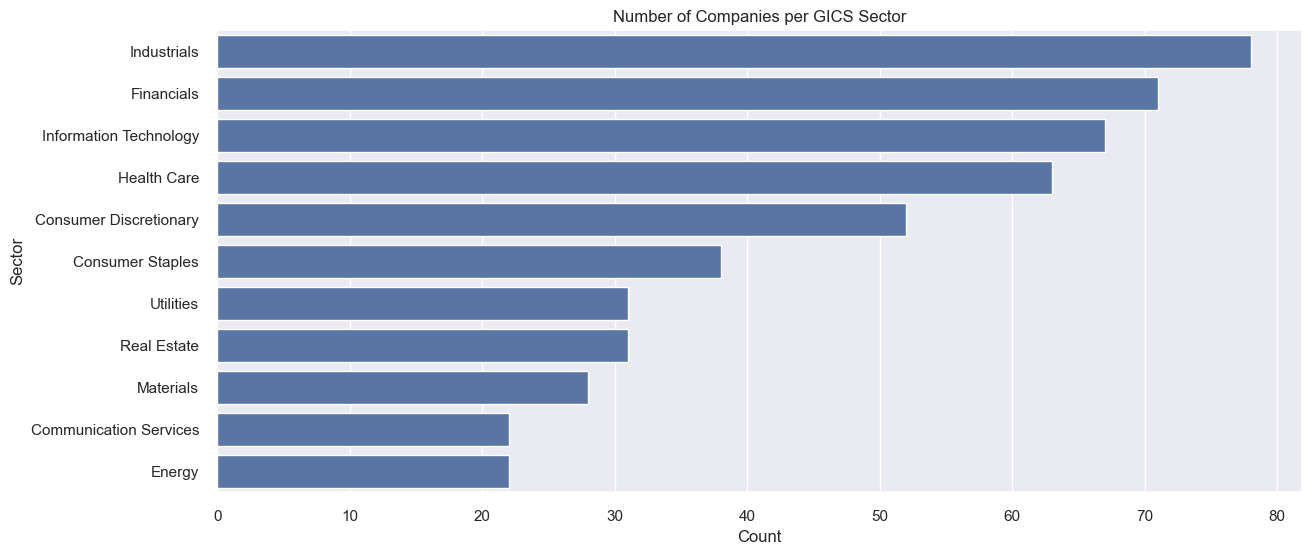

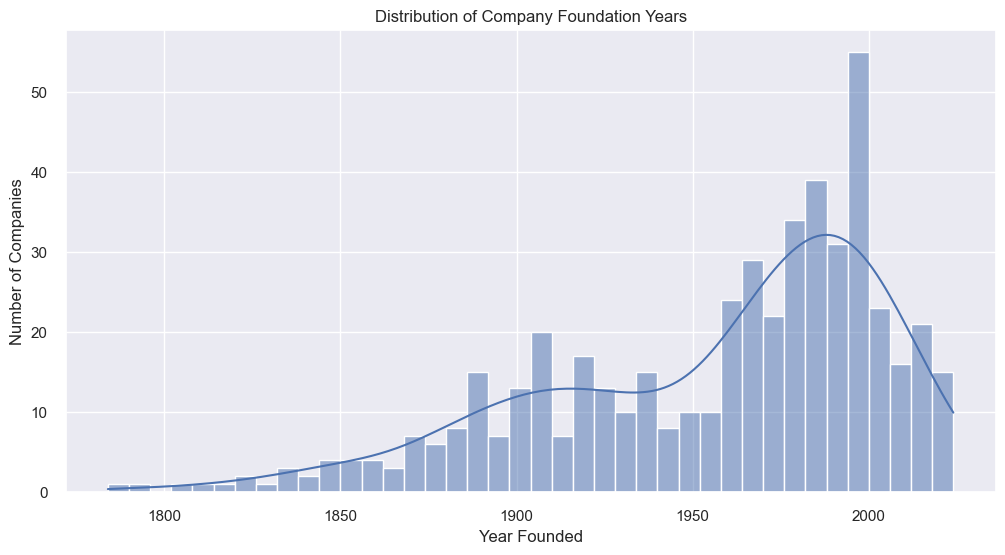

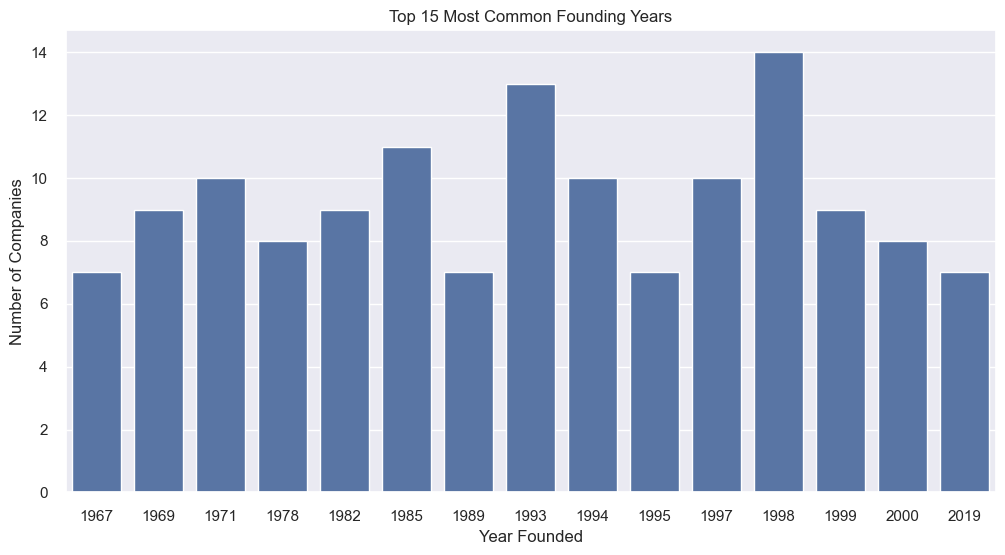

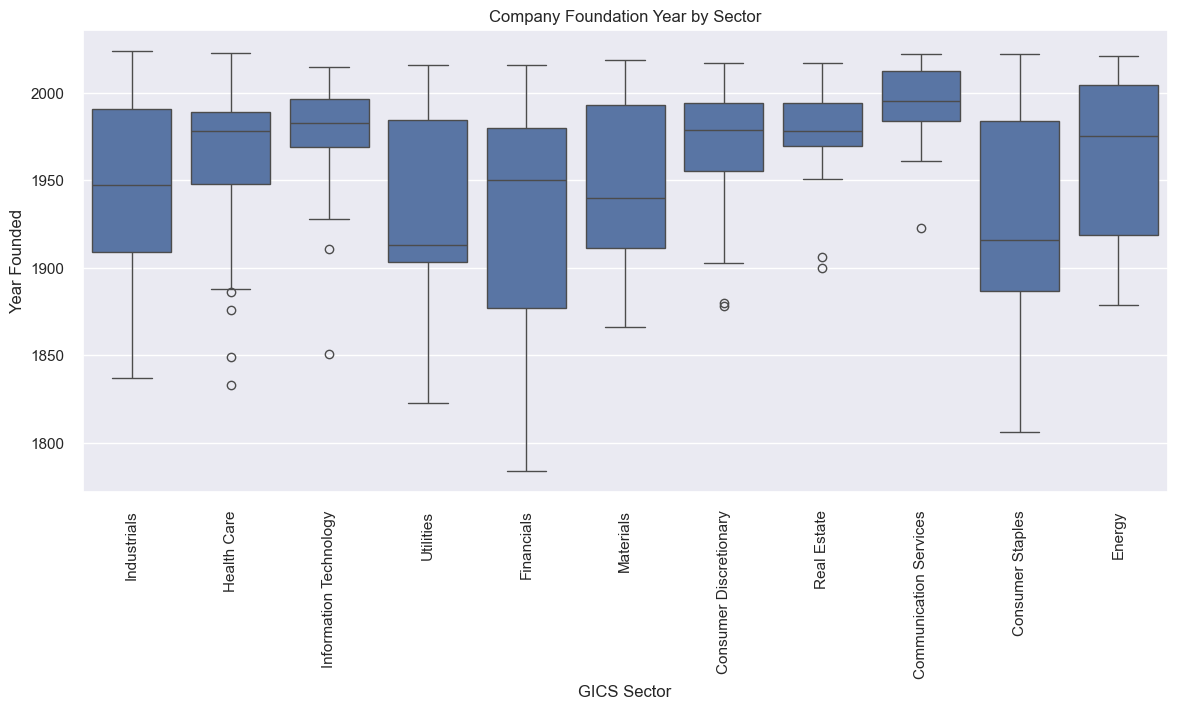


Average founding year per sector:
GICS Sector
Consumer Staples          1928.500000
Financials                1931.042254
Utilities                 1935.677419
Industrials               1946.051282
Materials                 1947.285714
Energy                    1960.227273
Health Care               1964.253968
Consumer Discretionary    1968.961538
Real Estate               1977.354839
Information Technology    1979.268657
Communication Services    1993.590909
Name: Founded_clean, dtype: float64


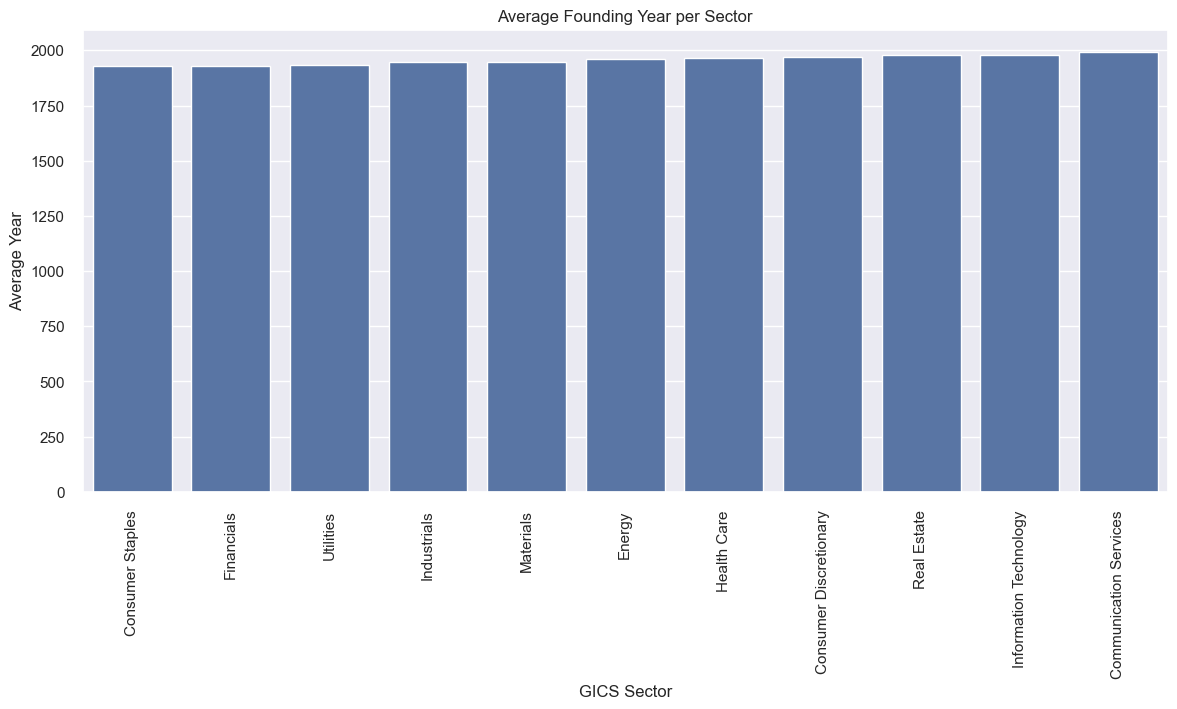


Companies founded after 2000: 75
           Security  Founded_clean             GICS Sector
3            AbbVie           2013             Health Care
11           Airbnb           2008  Consumer Discretionary
23            Amcor           2019               Materials
44  Arista Networks           2004  Information Technology
55     Baker Hughes           2017                  Energy


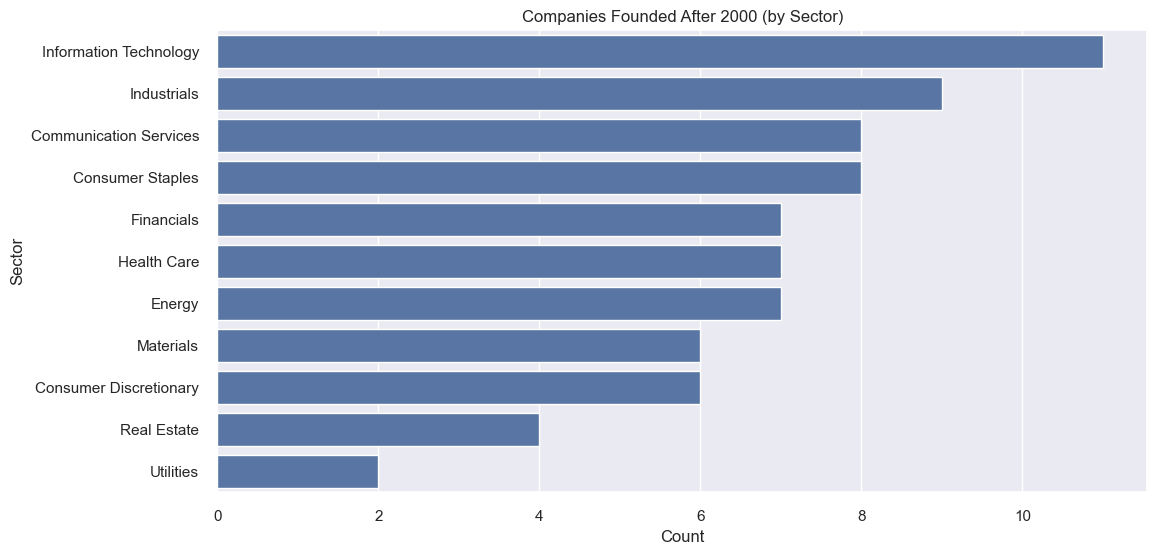

In [3]:
# payal chatterjee
#22BDS0226
# 1. Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
plt.style.use("seaborn-v0_8")
sns.set_theme()


# 2. Load dataset

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

# Check shape and first few rows
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


# 3. Clean 'Founded' column (extract years)

# Extract the first 4-digit year using regex
df["Founded_clean"] = df["Founded"].astype(str).str.extract(r"(\d{4})")

# Convert to numeric
df["Founded_clean"] = pd.to_numeric(df["Founded_clean"], errors="coerce")

# Drop rows where year could not be extracted
df = df.dropna(subset=["Founded_clean"])

print("\nAfter cleaning, sample rows:")
print(df[["Security", "Founded", "Founded_clean"]].head())


# 4. Basic info and missing values

print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())

# 5. Frequency of companies by GICS Sector

plt.figure(figsize=(14,6))
sns.countplot(data=df, y="GICS Sector", order=df["GICS Sector"].value_counts().index)
plt.title("Number of Companies per GICS Sector")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.show()


# 6. Distribution of founded years

plt.figure(figsize=(12,6))
sns.histplot(df["Founded_clean"], bins=40, kde=True)
plt.title("Distribution of Company Foundation Years")
plt.xlabel("Year Founded")
plt.ylabel("Number of Companies")
plt.show()


# 7. Top 15 most common founding years

top_years = df["Founded_clean"].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_years.index, y=top_years.values)
plt.title("Top 15 Most Common Founding Years")
plt.xlabel("Year Founded")
plt.ylabel("Number of Companies")
plt.show()


# 8. Sector vs Founded (Boxplot)

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="GICS Sector", y="Founded_clean")
plt.xticks(rotation=90)
plt.title("Company Foundation Year by Sector")
plt.ylabel("Year Founded")
plt.show()


# 9. Grouping: Average founding year per sector

avg_founded = df.groupby("GICS Sector")["Founded_clean"].mean().sort_values()
print("\nAverage founding year per sector:")
print(avg_founded)

plt.figure(figsize=(14,6))
sns.barplot(x=avg_founded.index, y=avg_founded.values)
plt.xticks(rotation=90)
plt.title("Average Founding Year per Sector")
plt.ylabel("Average Year")
plt.show()


# 10. Companies founded after 2000

recent_companies = df[df["Founded_clean"] >= 2000]
print("\nCompanies founded after 2000:", recent_companies.shape[0])
print(recent_companies[["Security", "Founded_clean", "GICS Sector"]].head())

plt.figure(figsize=(12,6))
sns.countplot(data=recent_companies, y="GICS Sector", order=recent_companies["GICS Sector"].value_counts().index)
plt.title("Companies Founded After 2000 (by Sector)")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.show()
